# Importing Libraries

In [1]:
# Author : Henil Shah
#---------------------
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing as ch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler as min_max_scaler



# Pre Processing and Train Test Split

In [2]:
#fetching the data
ch_df = ch(as_frame=True)
ch_data = ch_df['data']
ch_target = ch_df['target'].to_frame()
display(ch_data.head())
display(ch_data.tail())
display(ch_target.head())
display(ch_target.tail())

#training and testing models
X_train, X_test, Y_train, Y_test = train_test_split(ch_data, ch_target, test_size=0.2, random_state=0)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


,MedHouseVal
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


# KNN With Cross Validation (without scaling)

{'n_neighbors': 8}
Best score is: -1.1432959472352686


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008079,0.000064,0.007878,0.000064,1,{'n_neighbors': 1},-1.594536,-1.671804,-1.672620,-1.582450,...,-1.632780,0.037948,25,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.008061,0.000099,0.008621,0.000068,2,{'n_neighbors': 2},-1.308052,-1.316085,-1.323442,-1.257460,...,-1.299778,0.023325,24,-0.410584,-0.403969,-0.405777,-0.418042,-0.408322,-0.409339,0.004896
2,0.008037,0.000102,0.009143,0.000038,3,{'n_neighbors': 3},-1.225068,-1.219834,-1.236600,-1.171875,...,-1.213943,0.022124,23,-0.586863,-0.581146,-0.576764,-0.585713,-0.588954,-0.583888,0.004385
3,0.008051,0.000163,0.009646,0.000160,4,{'n_neighbors': 4},-1.177151,-1.179397,-1.197118,-1.140031,...,-1.176618,0.019647,13,-0.686893,-0.683468,-0.679425,-0.690827,-0.690394,-0.686201,0.004309
4,0.008074,0.000107,0.009931,0.000051,5,{'n_neighbors': 5},-1.175129,-1.152535,-1.179524,-1.128294,...,-1.161674,0.019095,8,-0.755864,-0.757324,-0.749573,-0.761262,-0.762080,-0.757221,0.004478
5,0.008060,0.000116,0.010414,0.000105,6,{'n_neighbors': 6},-1.155411,-1.155054,-1.174527,-1.122116,...,-1.150482,0.017057,5,-0.804737,-0.806821,-0.804040,-0.815623,-0.804179,-0.807080,0.004386
6,0.008112,0.000115,0.010778,0.000100,7,{'n_neighbors': 7},-1.147213,-1.152297,-1.170021,-1.120665,...,-1.144534,0.016924,2,-0.845370,-0.845790,-0.845531,-0.854671,-0.844038,-0.847080,0.003844
7,0.008098,0.000113,0.011099,0.000051,8,{'n_neighbors': 8},-1.147418,-1.146693,-1.166837,-1.129477,...,-1.143296,0.014636,1,-0.878663,-0.879565,-0.877849,-0.884033,-0.877014,-0.879425,0.002455
8,0.008110,0.000100,0.011371,0.000112,9,{'n_neighbors': 9},-1.149082,-1.150687,-1.171003,-1.136259,...,-1.147818,0.013633,3,-0.905693,-0.904810,-0.902123,-0.910390,-0.907787,-0.906161,0.002789
9,0.008122,0.000109,0.011739,0.000068,10,{'n_neighbors': 10},-1.154959,-1.156270,-1.172969,-1.132546,...,-1.150359,0.014960,4,-0.928879,-0.927554,-0.926863,-0.932913,-0.929599,-0.929161,0.002108


Mean Squared Error:  1.0892545840494126
R Square:  0.16465317771667487


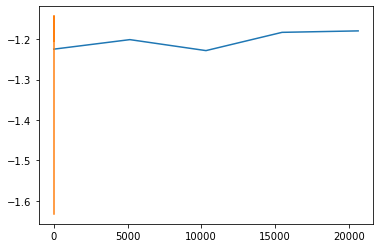

In [3]:
#KNN model + Cross Val Score 
knncv = knr(n_neighbors = 25)
nfolds=5
cv_scores = cross_val_score(knncv, X_train, Y_train, cv=nfolds, scoring="neg_mean_squared_error")
plt.plot(np.linspace(0,20639,nfolds),cv_scores)

#GridSearchCV Model
knncv2 = knr()
param_grid = {'n_neighbors': np.arange(1, 26)}
knn_gscv = GridSearchCV(knncv2, param_grid, return_train_score=True, cv=5, scoring='neg_mean_squared_error')
knn_gscv.fit(X_train, Y_train)

#Best output of K
print(knn_gscv.best_params_)
print("Best score is:",knn_gscv.best_score_)
df = pd.DataFrame(knn_gscv.cv_results_)
display(df)

#K vs mean_squared_error
plt.step(df['param_n_neighbors'],df['mean_test_score'])

#Prediction 
Y_pred = knn_gscv.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("R Square: " , r2_score(Y_test, Y_pred))



# KNN With Cross Validation (with scaling)

{'n_neighbors': 9}
Best score is: -0.016739931142322945


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009942,0.004889,0.029004,0.007701,1,{'n_neighbors': 1},-0.025873,-0.024975,-0.027341,-0.025722,...,-0.026113,0.000813,25,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.007454,0.000011,0.030298,0.004808,2,{'n_neighbors': 2},-0.020122,-0.020230,-0.021422,-0.019699,...,-0.020205,0.000659,24,-0.006502,-0.006578,-0.006340,-0.006599,-0.006403,-0.006484,0.000100
2,0.007565,0.000149,0.033259,0.005119,3,{'n_neighbors': 3},-0.018404,-0.017932,-0.019888,-0.017669,...,-0.018377,0.000792,23,-0.008991,-0.008962,-0.008875,-0.009109,-0.009028,-0.008993,0.000077
3,0.007468,0.000011,0.035378,0.005306,4,{'n_neighbors': 4},-0.017909,-0.016944,-0.018835,-0.016679,...,-0.017463,0.000804,22,-0.010301,-0.010418,-0.010212,-0.010556,-0.010477,-0.010393,0.000123
4,0.007621,0.000074,0.037982,0.005703,5,{'n_neighbors': 5},-0.017632,-0.016400,-0.018372,-0.016195,...,-0.017067,0.000817,13,-0.011069,-0.011248,-0.011010,-0.011390,-0.011396,-0.011223,0.000160
5,0.007622,0.000017,0.039869,0.005725,6,{'n_neighbors': 6},-0.017459,-0.016079,-0.018111,-0.016081,...,-0.016826,0.000818,7,-0.011750,-0.011878,-0.011616,-0.012112,-0.012066,-0.011884,0.000187
6,0.007629,0.000013,0.041495,0.005829,7,{'n_neighbors': 7},-0.017322,-0.016058,-0.017980,-0.016137,...,-0.016761,0.000760,3,-0.012304,-0.012444,-0.012145,-0.012601,-0.012495,-0.012398,0.000158
7,0.007623,0.000018,0.042996,0.006016,8,{'n_neighbors': 8},-0.017444,-0.015979,-0.018028,-0.016173,...,-0.016793,0.000800,4,-0.012801,-0.012938,-0.012639,-0.013041,-0.012933,-0.012870,0.000138
8,0.007636,0.000021,0.044286,0.006088,9,{'n_neighbors': 9},-0.017356,-0.016000,-0.018058,-0.016051,...,-0.016740,0.000824,1,-0.013163,-0.013390,-0.013019,-0.013423,-0.013284,-0.013256,0.000149
9,0.007661,0.000036,0.045690,0.006250,10,{'n_neighbors': 10},-0.017473,-0.016033,-0.017978,-0.015963,...,-0.016743,0.000824,2,-0.013469,-0.013756,-0.013349,-0.013747,-0.013631,-0.013590,0.000159


Mean Square Error 0.016641716303295917
R-Square 0.6997917646162589


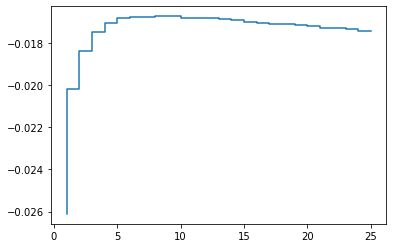

In [4]:
from sklearn import preprocessing
# Scaling 
min_max_scaler=preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(ch_data)
Y_scaled = min_max_scaler.fit_transform(ch_target)
ch_data_scaled = pd.DataFrame(X_scaled)
ch_target_scaled = pd.DataFrame(Y_scaled)
#display(ch_data_scaled.head())
#display(ch_target_scaled.head())

#train test
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(ch_data_scaled, ch_target_scaled, test_size=0.2, random_state=0)

knncv2 = knr()
param_grid = {'n_neighbors': np.arange(1, 26)}
knn_gscv = GridSearchCV(knncv2, param_grid, return_train_score=True, cv=5, scoring='neg_mean_squared_error')
knn_gscv.fit(X_train_s, Y_train_s)
print(knn_gscv.best_params_)
print("Best score is:",knn_gscv.best_score_)
df = pd.DataFrame(knn_gscv.cv_results_)
display(df)
plt.step(df['param_n_neighbors'],df['mean_test_score'])

Y_pred_s = knn_gscv.predict(X_test_s)
print("Mean Square Error", mean_squared_error(Y_test_s, Y_pred_s))
print("R-Square", r2_score(Y_test_s, Y_pred_s))


# Random Forest

In [5]:
#Random Forest 
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=10,n_jobs=-1,oob_score=True)
rfData=rf.fit(X_train,Y_train)
Y_pred=rfData.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("R Square: " , r2_score(Y_test, Y_pred))
print("\n Out of Bag score = " ,{rf.oob_score_})



<ipython-input-5-a0e44a8ca36b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfData=rf.fit(X_train,Y_train)


Mean Squared Error:  0.2794877474407168
R Square:  0.7856614926294069

 Out of Bag score =  {0.7945556021623661}
